In [17]:
import json
import datetime
result_text = ''
messages = {}
with open("result.json", "r", encoding='utf-8') as fh:
    # print(fh.read())
    messages = json.load(fh)

print(messages)

{'name': 'Кирилл Ю', 'type': 'personal_chat', 'id': 493731637, 'messages': [{'id': 25, 'type': 'message', 'date': '2018-06-03T16:23:24', 'date_unixtime': '1528032204', 'from': 'Кирилл Ю', 'from_id': 'user493731637', 'text': 'Приём.', 'text_entities': [{'type': 'plain', 'text': 'Приём.'}]}, {'id': 26, 'type': 'message', 'date': '2018-06-03T16:23:52', 'date_unixtime': '1528032232', 'from': 'Михаэль Креславский', 'from_id': 'user613759661', 'text': 'Волга на связи', 'text_entities': [{'type': 'plain', 'text': 'Волга на связи'}]}, {'id': 27, 'type': 'message', 'date': '2018-06-03T16:24:16', 'date_unixtime': '1528032256', 'from': 'Михаэль Креславский', 'from_id': 'user613759661', 'text': 'Так круто чувствовать себя нарушителем', 'text_entities': [{'type': 'plain', 'text': 'Так круто чувствовать себя нарушителем'}]}, {'id': 28, 'type': 'message', 'date': '2018-06-03T16:24:22', 'date_unixtime': '1528032262', 'from': 'Кирилл Ю', 'from_id': 'user493731637', 'text': 'Приём цветных изделий*', 'te

In [47]:
###Количество сообщений
len(messages['messages'])

5340

In [48]:
###Количество reply
reply_count = 0
for message in messages['messages']:
    if "reply_to_message_id" in message:
        reply_count+=1
print(reply_count)      

459


In [49]:
###Количество сообщений в день
days = {}
format = "%Y-%m-%dT%H:%M:%S"
for message in messages['messages']:
    dt = datetime.datetime.strptime(message['date'], format)
    if dt.date() not in days.keys():
        days[dt.date()] = 1
    else:
        days[dt.date()]+=1

print(dict(sorted(days.items(), key=lambda item: item[1],reverse=True)))


{datetime.date(2022, 8, 12): 234, datetime.date(2022, 8, 19): 113, datetime.date(2022, 9, 2): 106, datetime.date(2022, 10, 2): 97, datetime.date(2022, 9, 1): 91, datetime.date(2023, 5, 30): 86, datetime.date(2022, 7, 14): 85, datetime.date(2022, 8, 8): 82, datetime.date(2022, 10, 31): 82, datetime.date(2022, 7, 17): 76, datetime.date(2020, 6, 2): 75, datetime.date(2023, 7, 16): 75, datetime.date(2020, 2, 9): 68, datetime.date(2019, 10, 1): 67, datetime.date(2022, 5, 14): 67, datetime.date(2022, 9, 20): 64, datetime.date(2022, 9, 24): 61, datetime.date(2023, 2, 21): 61, datetime.date(2022, 8, 16): 59, datetime.date(2022, 11, 4): 57, datetime.date(2023, 11, 21): 54, datetime.date(2022, 9, 21): 53, datetime.date(2022, 8, 31): 51, datetime.date(2022, 8, 27): 50, datetime.date(2023, 9, 22): 49, datetime.date(2022, 9, 29): 48, datetime.date(2019, 5, 6): 46, datetime.date(2021, 9, 1): 45, datetime.date(2022, 9, 18): 45, datetime.date(2021, 10, 18): 44, datetime.date(2022, 10, 8): 44, datetime

# Среднее количество сообщений в день

In [50]:
###Среднее количество сообщений в день
print(sum(days.values())/len(days.keys()))

17.8


# Среднее число слов в сообщениях

In [51]:
###Среднее число слов в сообщениях
count_messages = 0
sum_words = 0
for message in messages['messages']:
    count_messages+=1
    #print(message['text'])
    try:
        sum_words+=len(message['text'].split())
    except Exception as e:
        ...
    
print(sum_words/count_messages)    

8.005805243445693


<BarContainer object of 0 artists>

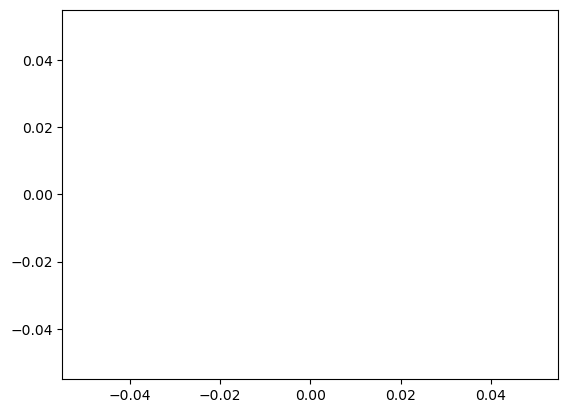

In [8]:
###График сообщений в день
import matplotlib.pyplot as plt
width = 1.0
plt.bar(days.keys(), days.values(), width, color='g')

In [3]:
###Количество диалогов (расстояние между сообщениями более 12 часов)
days = {}
format = "%Y-%m-%dT%H:%M:%S"
count_dialogs = 0
time_to_respond_hours = []
for i in range(1,len(messages['messages'])):
    dt1 = datetime.datetime.strptime(messages['messages'][i-1]['date'], format)
    dt2 = datetime.datetime.strptime(messages['messages'][i]['date'], format)
    difference = dt2 - dt1
    difference_in_hours = difference.total_seconds() / 3600
    time_to_respond_hours.append(difference_in_hours)
    if difference_in_hours>12:
        count_dialogs+=1

print(count_dialogs)



270


# Распределние между временем ответа на сообщение

{'whiskers': [<matplotlib.lines.Line2D at 0x24379f60cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x24379f62010>,
 'boxes': [<matplotlib.lines.Line2D at 0x243799acc50>],
 'medians': [<matplotlib.lines.Line2D at 0x24379f63250>],
 'fliers': [<matplotlib.lines.Line2D at 0x24379f639d0>],
 'means': []}

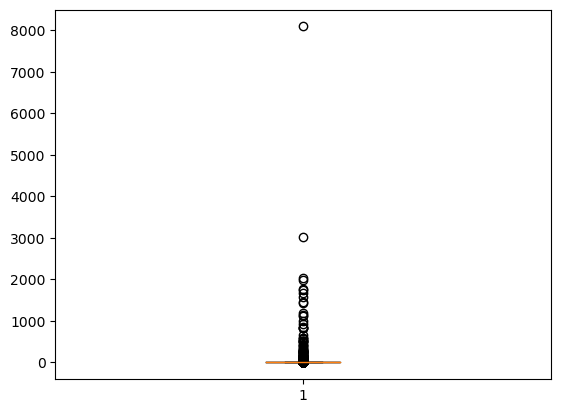

In [54]:
### Распределние между временем ответа на сообщение
# Создание гистограммы

plt.boxplot(time_to_respond_hours)

(array([5.32e+03, 1.20e+01, 5.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([   0.     ,  808.93825, 1617.8765 , 2426.81475, 3235.753  ,
        4044.69125, 4853.6295 , 5662.56775, 6471.506  , 7280.44425,
        8089.3825 ]),
 <BarContainer object of 10 artists>)

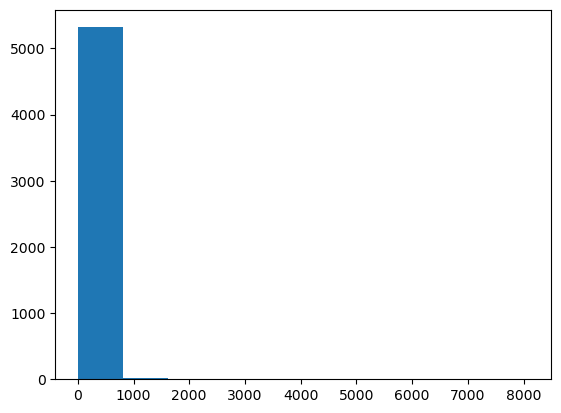

In [55]:
plt.hist(time_to_respond_hours)

In [57]:
response1 = [time for time in time_to_respond_hours if (time)<=(1/12)]
response2 = [time for time in time_to_respond_hours if ((time)>(1/12) and (time)<=(0.5))]
response3 = [time for time in time_to_respond_hours if ((time>0.5) and (time<=11/12))]
response4 = [time for time in time_to_respond_hours if (time>11/12)]
print(len(time_to_respond_hours),len(response1), len(response2), len(response3), len(response4))

5339 4302 394 99 544


# Среднее время ответа, после того, как была поставлена реакция на сообщение

In [4]:
###Среднее время ответа, после того, как была поставлена реакция на сообщение

time_to_respond_hours = []
for i in range(1,len(messages['messages'])):
    dt1 = datetime.datetime.strptime(messages['messages'][i-1]['date'], format)
    dt2 = datetime.datetime.strptime(messages['messages'][i]['date'], format)
    if 'reactions' in messages['messages'][i-1].keys():
        #print(messages['messages'][i-1])
        difference = dt2 - dt1
        difference_in_hours = difference.total_seconds()
        time_to_respond_hours.append(difference_in_hours)
print(time_to_respond_hours)
print(len(time_to_respond_hours))        
print(sum(time_to_respond_hours)/len(time_to_respond_hours))


[80.0, 847348.0, 13.0, 0.0, 6.0, 60091.0, 68195.0, 57.0, 4.0, 49276.0, 8.0, 76.0, 21.0, 0.0, 44.0, 57.0, 15.0, 8.0, 8.0, 3456.0, 41.0, 61.0, 3572.0, 40.0, 83967.0, 22.0, 4036.0, 16.0, 7.0, 37.0, 43.0, 54501.0, 4.0, 33.0, 493.0, 6661.0, 4.0, 16.0, 12274.0, 51.0, 0.0, 13.0, 71841.0, 2051763.0, 258.0, 12.0, 34.0, 18.0, 13.0, 180.0, 33.0, 43.0, 35.0, 18.0, 73.0, 9.0, 91847.0, 4127.0, 29.0, 88.0, 28.0, 156749.0, 109949.0, 32840.0, 948.0, 20174.0, 14232.0, 221157.0, 3596496.0, 26487.0, 1181396.0, 36.0, 2243.0, 22.0, 2520.0, 1.0, 10.0, 71.0]
78
112569.67948717948


In [5]:
###Медианное время
import statistics
print(statistics.median(time_to_respond_hours))

47.5


In [6]:
statistics.stdev(time_to_respond_hours)

488734.53674429655

# Распределение сообщений по времени суток

(array([1922.,    0.,    0., 2104.,    0.,    0.,  967.,    0.,    0.,
         347.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

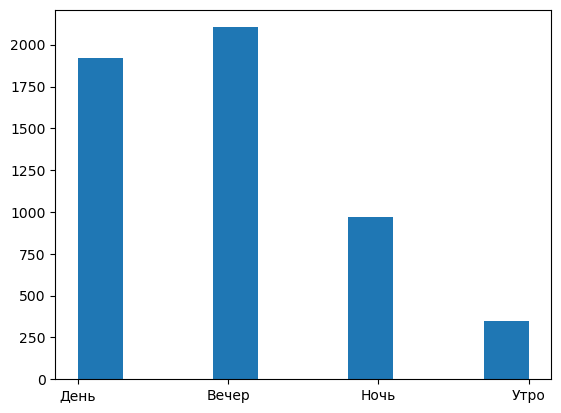

In [9]:
###Наиболее частое время суток для общения
part_of_day = []
for message in messages['messages']:
    dt1 = datetime.datetime.strptime(message['date'], format)
    if 6 <= dt1.hour < 12:
        part_of_day.append("Утро")
    elif 12 <= dt1.hour < 18:
        part_of_day.append("День")
    elif 18 <= dt1.hour < 24:
        part_of_day.append("Вечер")
    else:
        part_of_day.append("Ночь")

statistics.mode(part_of_day)
plt.hist(part_of_day)

# Распределение времен до ответа на сообщение

{'id': 71024, 'type': 'message', 'date': '2022-09-02T22:17:12', 'date_unixtime': '1662146232', 'from': 'Кирилл Ю', 'from_id': 'user493731637', 'reply_to_message_id': 71023, 'text': 'СПОЙЛЕР!', 'text_entities': [{'type': 'plain', 'text': 'СПОЙЛЕР!'}]}
{'id': 71015, 'type': 'message', 'date': '2022-09-02T22:15:29', 'date_unixtime': '1662146129', 'from': 'Михаэль Креславский', 'from_id': 'user613759661', 'forwarded_from': 'Лисиха', 'text': 'Я бы наверное брала те что к центру ближе', 'text_entities': [{'type': 'plain', 'text': 'Я бы наверное брала те что к центру ближе'}]}
list index out of range
15132.2903930131
3.0
52.430131004366814
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

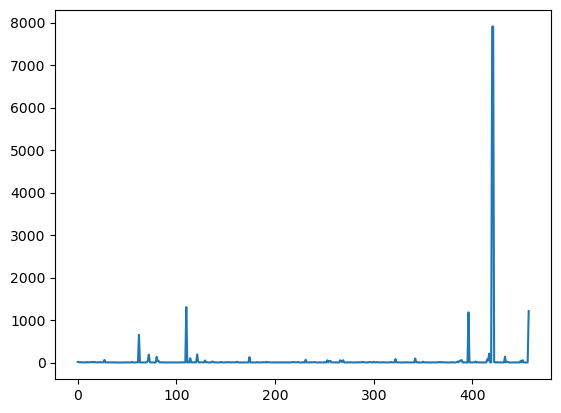

In [33]:
time_to_reply = []
distance = []
for message in messages['messages']:
    if 'reply_to_message_id' in message.keys():
        try:
            dt_answer = datetime.datetime.strptime(message['date'], format)
            message_first = [message_r for message_r in messages['messages'] if (message_r['id']==message['reply_to_message_id'])][0]

            dt_first = datetime.datetime.strptime(message_first['date'], format)
            difference = dt_answer - dt_first
            dist = message['id'] - message['reply_to_message_id']
            distance.append(dist)

            difference = difference.total_seconds()
            #print(difference)
            time_to_reply.append(difference)
        except Exception as e:
            print(message)
            print(message_first)
            print(e)
        
print(sum(time_to_reply)/len(time_to_reply))  

print(statistics.median(distance))
print(statistics.mean(distance))
print(statistics.(distance))
plt.plot(distance)